In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [5]:
df.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


# Data preprocessing

In [6]:
df.shape

(7920, 3)

In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

id       0
label    0
tweet    0
dtype: int64

### Text Preprocessing

In [9]:
import re
import string

#### convert uppercase to lovercase

In [10]:
df['tweet'] = df['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [11]:
df['tweet'].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

#### remove links

In [12]:
df['tweet'] = df['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [13]:
df['tweet'].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

#### remove functuations

In [14]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

df['tweet'] = df['tweet'].apply(remove_punctuations)

In [15]:
df['tweet'].head()

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

#### remove numbers

In [16]:
df['tweet'] = df['tweet'].str.replace('\d+','',regex=True)

In [17]:
df['tweet'].tail()

7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

#### remove stopwords

In [18]:
#!pip install nltk 

In [19]:
import nltk

In [20]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
with open('../static/model/corpora/stopwords/english','r') as file:
    sw = file.read().splitlines()

In [22]:
df['tweet'] = df['tweet'].apply(lambda x: ' '.join(x for x in x.split() if x not in sw))

In [23]:
df['tweet'].tail()

7915    live loud lol liveoutloud selfie smile sony mu...
7916    would like wish amazing day make every minute ...
7917    helping lovely year old neighbor ipad morning ...
7918    finally got smart pocket wifi stay connected a...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

#### stemming

In [24]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [25]:
df['tweet'] = df['tweet'].apply(lambda x: ' '.join(ps.stem(x) for x in x.split()))

In [26]:
df['tweet'].tail()

7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, dtype: object

#### Buiding vocabulary

In [28]:
from collections import Counter
vocab = Counter()

In [29]:
for sentence in df['tweet']:
    vocab.update(sentence.split())

In [32]:
tokens = [key for key in vocab if vocab[key]>10]

In [33]:
def save_vocabulary(lines,filename):
    data = '\n'.join(lines)
    file = open(filename,'w',encoding='utf-8')
    file.write(data)
    file.close()
    
save_vocabulary(tokens,'../static/model/vocabulary.txt')

### Devide dataset

In [35]:
x = df['tweet']
y = df['label']

In [36]:
#!pip install scikit-learn

  Using cached scikit_learn-1.2.2-cp39-cp39-win_amd64.whl (8.4 MB)
                                              0.0/42.5 MB ? eta -:--:--
                                              0.0/42.5 MB ? eta -:--:--
                                              0.0/42.5 MB ? eta -:--:--
                                              0.0/42.5 MB ? eta -:--:--
                                              0.0/42.5 MB ? eta -:--:--
                                              0.0/42.5 MB ? eta -:--:--
                                              0.0/42.5 MB ? eta -:--:--
                                              0.0/42.5 MB ? eta -:--:--
                                              0.0/42.5 MB ? eta -:--:--
                                              0.0/42.5 MB ? eta -:--:--
                                             0.0/42.5 MB 262.6 kB/s eta 0:02:42
                                             0.0/42.5 MB 217.9 kB/s eta 0:03:15
                                             0.1/42.5

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

### Vectorization

In [41]:
def vectorizer(ds,vocabulary):
    vectorized_list = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_list.append(sentence_lst)
        
        
    vectorized_list_new = np.asarray(vectorized_list,dtype = np.float32)
    
    return vectorized_list_new

In [42]:
vectorized_x_train = vectorizer(x_train,tokens)

In [43]:
vectorized_x_test = vectorizer(x_test,tokens)

In [44]:
y_train.value_counts()

label
0    4704
1    1632
Name: count, dtype: int64

In [58]:
pi = pd.DataFrame(y_train.value_counts())
pi = pi.reset_index()

<BarContainer object of 2 artists>

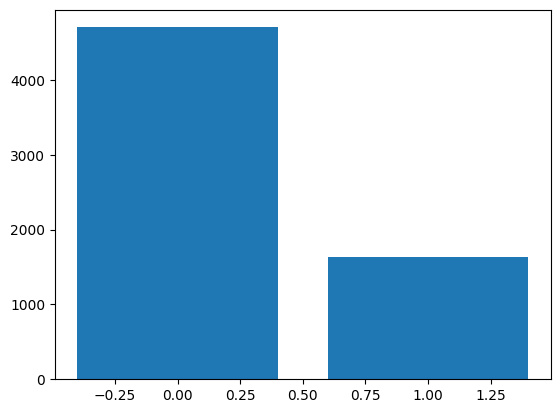

In [61]:
plt.bar(pi['label'],pi['count'])

### Handle imbalanced data

In [63]:
#!pip install imbalanced-learn

  Using cached imbalanced_learn-0.10.1-py3-none-any.whl (226 kB)


In [64]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_somte, y_train_smote = smote.fit_resample(vectorized_x_train,y_train)

In [67]:
y_train_smote.value_counts()

label
1    4704
0    4704
Name: count, dtype: int64

## Model training and evaluation

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [72]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act,y_pred):
    acc = round(accuracy_score(y_act,y_pred),3)
    pr = round(precision_score(y_act,y_pred),3)
    rec = round(recall_score(y_act,y_pred),3)
    f1 = round(f1_score(y_act,y_pred),3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
          
def validation_scores(y_act,y_pred):
    acc = round(accuracy_score(y_act,y_pred),3)
    pr = round(precision_score(y_act,y_pred),3)
    rec = round(recall_score(y_act,y_pred),3)
    f1 = round(f1_score(y_act,y_pred),3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

## Logistic reggression

In [79]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_somte,y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_somte)

training_scores(y_train_smote,y_train_pred)

y_test_pred = lr.predict(vectorized_x_test)

validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 0.94
	Precision = 0.916
	Recall = 0.968
	F1-Score = 0.941
Training Scores:
	Accuracy = 0.878
	Precision = 0.716
	Recall = 0.845
	F1-Score = 0.775


## Naive Bayes

In [80]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_somte,y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_somte)

training_scores(y_train_smote,y_train_pred)

y_test_pred = mnb.predict(vectorized_x_test)

validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 0.905
	Precision = 0.869
	Recall = 0.955
	F1-Score = 0.91
Training Scores:
	Accuracy = 0.87
	Precision = 0.673
	Recall = 0.929
	F1-Score = 0.78


## Decision Tree

In [81]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_somte,y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_somte)

training_scores(y_train_smote,y_train_pred)

y_test_pred = dt.predict(vectorized_x_test)

validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Training Scores:
	Accuracy = 0.84
	Precision = 0.684
	Recall = 0.66
	F1-Score = 0.672


## Random Forest

In [82]:
rf = RandomForestClassifier()
rf.fit(vectorized_x_train_somte,y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_somte)

training_scores(y_train_smote,y_train_pred)

y_test_pred = rf.predict(vectorized_x_test)

validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Training Scores:
	Accuracy = 0.871
	Precision = 0.759
	Recall = 0.703
	F1-Score = 0.73


## Support Vector Machine

In [83]:
svm = SVC()
svm.fit(vectorized_x_train_somte,y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_somte)

training_scores(y_train_smote,y_train_pred)

y_test_pred = svm.predict(vectorized_x_test)

validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 0.979
	Precision = 0.963
	Recall = 0.995
	F1-Score = 0.979
Training Scores:
	Accuracy = 0.879
	Precision = 0.735
	Recall = 0.802
	F1-Score = 0.767


In [85]:
import pickle

with open('../static/model/model.pickle','wb') as file:
    pickle.dump(lr,file)